In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.formula.api as smf  #for ols(ordinary least square) to perform linear regression

import pickle  #or from pickle import dump

import warnings
warnings.filterwarnings('ignore')

# 2. Data Collection

In [2]:
np_data=pd.read_csv(r"D:\Data Science\Data sets\NewspaperData.csv")
np_data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


# 3. Data Understanding

## 3.1 Perform Initial Analysis

In [5]:
np_data.shape

(34, 3)

In [43]:
list(np_data.columns)

['Newspaper', 'daily', 'sunday']

In [6]:
np_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [7]:
np_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [8]:
np_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

## 3.2 Perform Assumption Check

### 1. Linearity Test

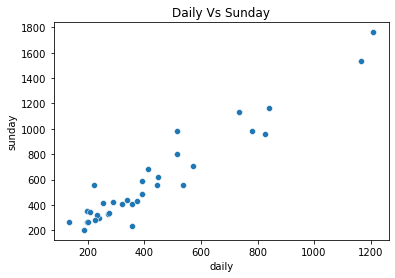

In [19]:
#Scatterplot using seaborn library

sns.scatterplot(data='np_data', x=np_data['daily'], y=np_data['sunday'])
#sns.scatterplot(data='np_data', x='daily', y='sunday') #This command will not work
plt.title('Daily Vs Sunday')
plt.show()

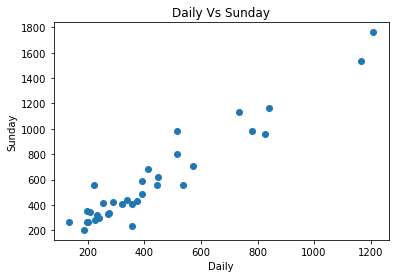

In [23]:
#Scatterplot using matplotlib

plt.scatter(np_data['daily'],np_data['sunday'])
#plt.scatter(data='np_data',x='daily',y='sunday')
plt.title('Daily Vs Sunday')
plt.xlabel('Daily')
plt.ylabel('Sunday')
plt.show()

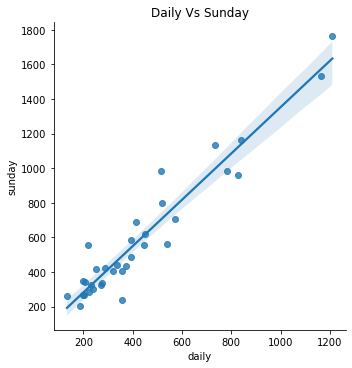

In [17]:
sns.lmplot(data=np_data, x='daily', y='sunday')
plt.title('Daily Vs Sunday')
plt.show()

### Linear test Fails 
* as all the values does not lie on the line and is scattered across the linear line

<AxesSubplot:xlabel='daily', ylabel='sunday'>

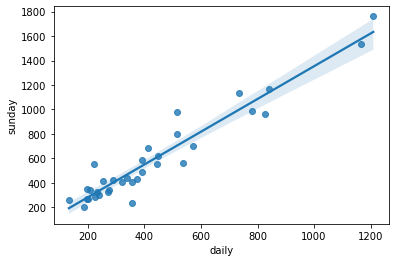

In [46]:
sns.regplot('daily','sunday',data=np_data)

### 3. Normality Test 

<AxesSubplot:xlabel='daily', ylabel='Density'>

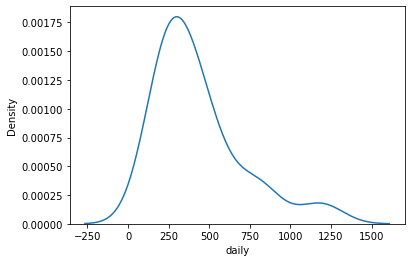

In [28]:
sns.distplot(a=np_data['daily'],hist=False, kde=True)  #by default hist and kde are True

### Normality test also Fails

# 4. Data Preparation

In [31]:
 np_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [44]:
del np_data['Newspaper']
np_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [37]:
np_data.dtypes # the datatypes for model preparation and everyting should be numbers like int/float for analysis. So we can remove all other parameters that are not necessary

daily     float64
sunday    float64
dtype: object

In [38]:
np_data.isna().sum()

daily     0
sunday    0
dtype: int64

# 5. Model Building and 6. Model Training

### Linear Regression Model can be built by using any of the 2 libraries:

 1. Statsmodels
 2. sklearn

### Using 1st method, the statsmodels.regression.linear_model.OLS method is used to perform linear regression

In [49]:
import statsmodels.formula.api as smf

In [55]:
linear_reg_model=smf.ols(formula='sunday~daily',data=np_data).fit()
linear_reg_model

In [57]:
linear_reg_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [58]:
linear_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           6.02e-19
Time:                        22:30:51   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. Model Testing 

## Manual Prediction for testing 
- For simple linear regression, y = mx+c 

In [60]:
# for x=100
y=(100*1.3397)+13.8356
y

147.8056

In [61]:
#for x=200
y=(200*1.3397)+13.8356
y

281.7756

In [62]:
#for x=300
y=(300*1.3397)+13.8356
y

415.74559999999997

In [66]:
#for x=400
y=(400*1.3397)+13.8356
y

549.7156

In [67]:
#for x=500
y=(500*1.3397)+13.8356
y

683.6855999999999

In [90]:
model_test_manual=pd.DataFrame({'daily':[100,200,300,400,500],'test':[147.8056,281.7756,415.74559999999997,549.7156,683.6855999999999]})

In [70]:
x_test=pd.DataFrame({'daily':[100,200,300,400,500]})
x_test

,daily
0,100
1,200
2,300
3,400
4,500


In [71]:
linear_reg_model.predict(x_test)

0    147.807106
1    281.778581
2    415.750057
3    549.721533
4    683.693009
dtype: float64

In [91]:
model_test_manual

,daily,test
0,100,147.8056
1,200,281.7756
2,300,415.7456
3,400,549.7156
4,500,683.6856


### Model testing is passed as the manually calculated and machine predicted values are almost same

# 9. Model Deployment

- Done using pickle library
- pickle - used for serialization and de-serialization of a python object structure
- It's the process of converting a python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network

In [75]:
from pickle import dump

In [76]:
dump(linear_reg_model,open('np_intelligence','wb'))

In [83]:
from pickle import load

In [84]:
#np_loaded=
load(open('np_intelligence','rb'))
#np_loaded

In [86]:
np_loaded=load(open('np_intelligence','rb'))

Intercept    13.835630
daily         1.339715
dtype: float64

In [89]:
np_loaded.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [93]:
np_loaded.predict(model_test_manual)

0    147.807106
1    281.778581
2    415.750057
3    549.721533
4    683.693009
dtype: float64

In [94]:
np_loaded.predict(x_test)

0    147.807106
1    281.778581
2    415.750057
3    549.721533
4    683.693009
dtype: float64

In [88]:
np_loaded.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64